In [191]:
import pandas as pd
import numpy as np
#import pycountry
import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
#from statsmodels.stats.weightstats import ztest as ztest
#from statsmodels.multivariate.manova import MANOVA
#import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots

In [161]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

In [162]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500


In [194]:
scaler = MinMaxScaler()
df['normalized_Sales']= scaler.fit_transform(df[['Sales']])  

In [163]:
df['Date'] = pd.DatetimeIndex(df['Date'])

In [164]:
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [ ]:
df['']

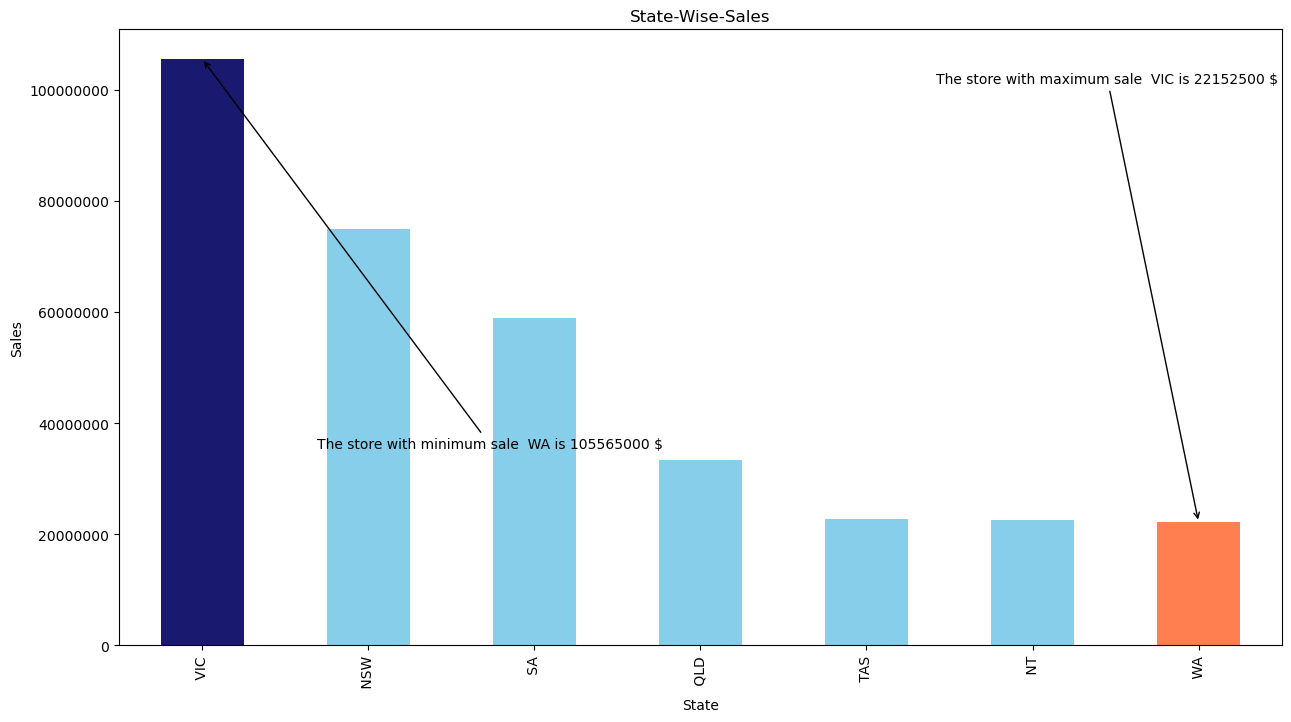

In [200]:
plt.figure(figsize=(15,8))

State_Wise_Sales_array = np.array(State_Wise_Sales)

max_value = max(State_Wise_Sales_array)
min_value = min(State_Wise_Sales_array)

clrs =[]

for x in State_Wise_Sales_array:
    if x==max_value:
        clrs.append('midnightblue')
    elif x==min_value:
        clrs.append('coral')
    else:
        clrs.append('skyblue')

ax = State_Wise_Sales.plot(kind='bar',color=clrs)

p = ax.patches[0]

ax.annotate(f'The store with minimum sale {Low_State} is {p.get_height()} $',
           xy=(p.get_x() + p.get_width() / 2, p.get_height()),
           xycoords='data',
           xytext=(0.17, 0.32), textcoords='axes fraction',
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))


p = ax.patches[-1]

ax.annotate(f'The store with maximum sale {Top_State} is {p.get_height()} $',
           xy=(p.get_x() + p.get_width() / 2, p.get_height()),
           xycoords='data',
           xytext=(0.85, 0.92), textcoords='axes fraction',
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
           horizontalalignment='center',verticalalignment='center')

plt.xlabel('State')
plt.ylabel('Sales')
plt.title('State-Wise-Sales')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')

<AxesSubplot:>

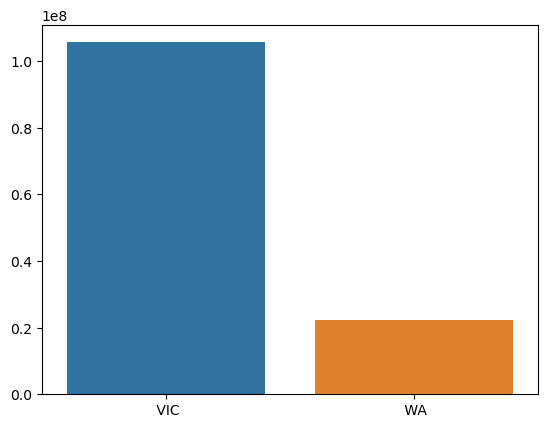

In [166]:
Top_State = State_Wise_Sales.idxmax()
Low_State = State_Wise_Sales.idxmin()

sns.barplot(x=[Top_State,Low_State],y=[State_Wise_Sales[Top_State],State_Wise_Sales[Low_State]])

<AxesSubplot:xlabel='Group'>

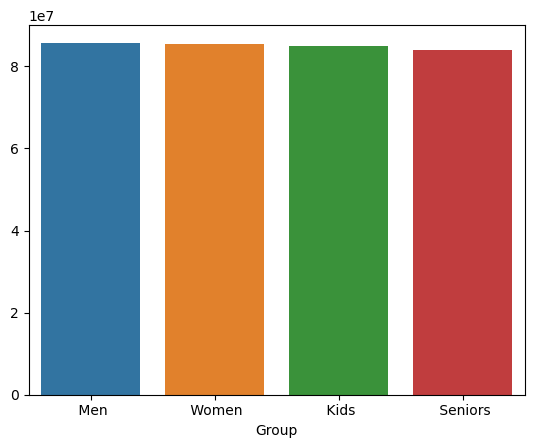

In [167]:
Group_Wise_Sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=Group_Wise_Sales.index,y=Group_Wise_Sales.values)

<AxesSubplot:>

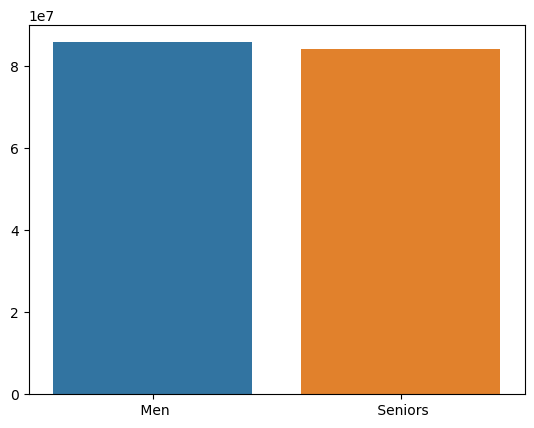

In [168]:
Top_Group = Group_Wise_Sales.idxmax()
Low_Group = Group_Wise_Sales.idxmin()

sns.barplot(x=[Top_Group,Low_Group],y=[Group_Wise_Sales[Top_Group],Group_Wise_Sales[Low_Group]])

In [169]:
group_data_sales = df.groupby('Sales').agg({'Sales':['mean','median','std', lambda x: x.mode()[0]]})

In [170]:
group_data_sales.columns = ['mean','median','std','mod']

In [171]:
group_data_sales

,mean,median,std,mod
Sales,,,,
5000,5000.0,5000.0,0.0,5000
7500,7500.0,7500.0,0.0,7500
10000,10000.0,10000.0,0.0,10000
12500,12500.0,12500.0,0.0,12500
15000,15000.0,15000.0,0.0,15000
...,...,...,...,...
152500,152500.0,152500.0,0.0,152500
155000,155000.0,155000.0,0.0,155000
157500,157500.0,157500.0,0.0,157500


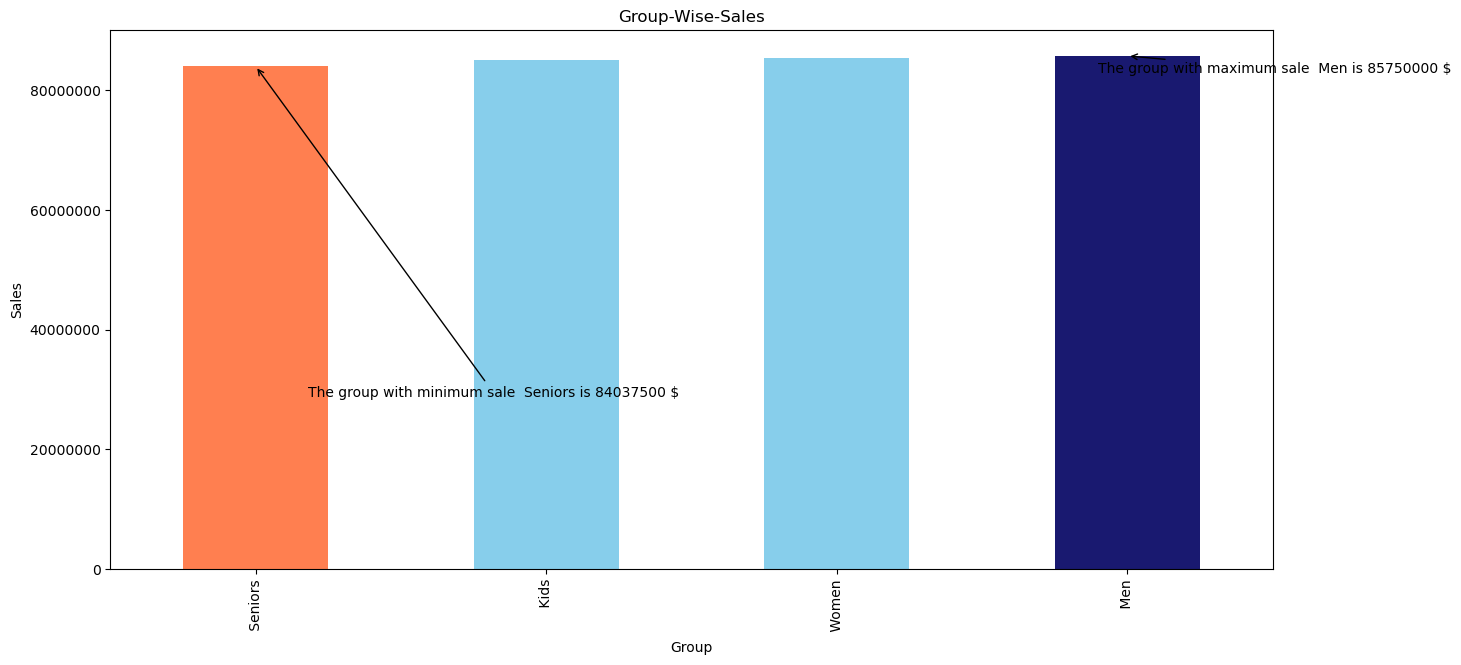

In [172]:
plt.figure(figsize=(15,7))
Group_Wise_Sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=True)

Group_Wise_Sales_Array = np.array(Group_Wise_Sales)

Top_Group = Group_Wise_Sales.idxmax()
Low_Group = Group_Wise_Sales.idxmin()

clrs= []

max_value= max(Group_Wise_Sales_Array)
min_value= min(Group_Wise_Sales_Array)

for x in Group_Wise_Sales_Array:
    if x==max_value:
        clrs.append('midnightblue')
    elif x==min_value:
        clrs.append('coral')
    else:
        clrs.append('skyblue')
        
ax = Group_Wise_Sales.plot(kind='bar',color=clrs)

p = ax.patches[0]

Top_Group = Group_Wise_Sales.idxmax()
Low_Group = Group_Wise_Sales.idxmin()

ax.annotate(f'The group with minimum sale {Low_Group} is {p.get_height()} $',
           xy=(p.get_x() + p.get_width() / 2, p.get_height()),
           xycoords='data',
           xytext=(0.17, 0.32), textcoords='axes fraction',
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

p = ax.patches[-1]
ax.annotate(f'The group with maximum sale {Top_Group} is {p.get_height()} $',
           xy=(p.get_x() + p.get_width() / 2, p.get_height()),
           xycoords='data',
           xytext=(0.85, 0.92), textcoords='axes fraction',
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.xlabel('Group')
plt.ylabel('Sales')
plt.title('Group-Wise-Sales')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')

<AxesSubplot:xlabel='State', ylabel='Sales'>

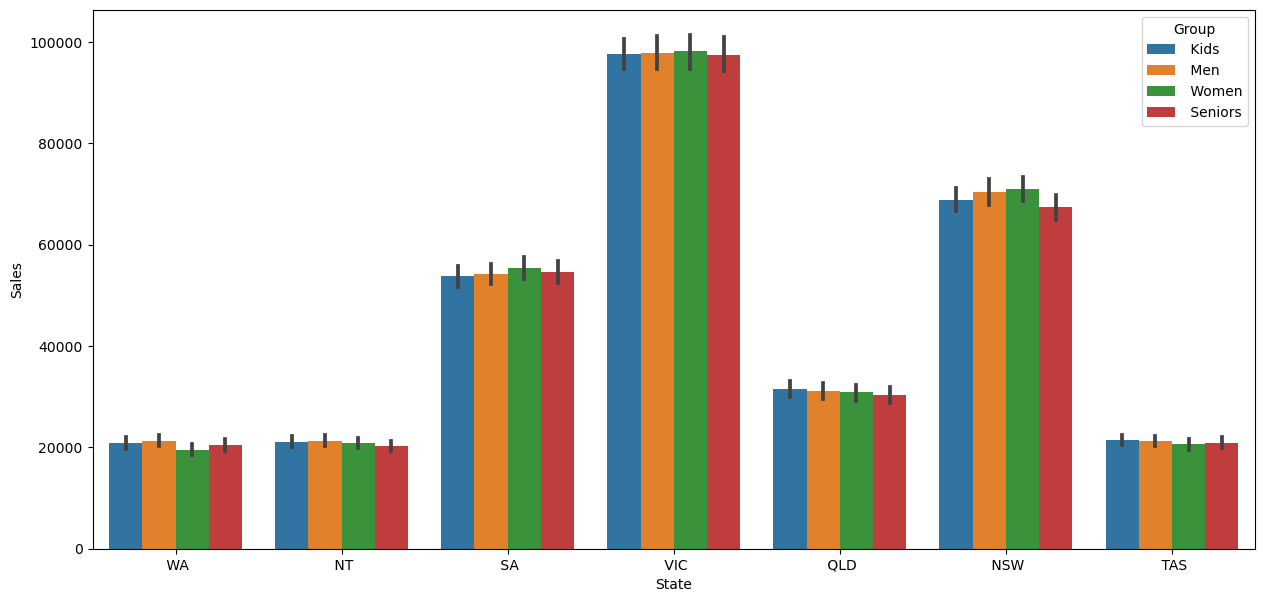

In [173]:
plt.figure(figsize=(15,7))
sns.barplot(x='State',y='Sales',hue='Group',data=df)

<AxesSubplot:xlabel='Group', ylabel='Sales'>

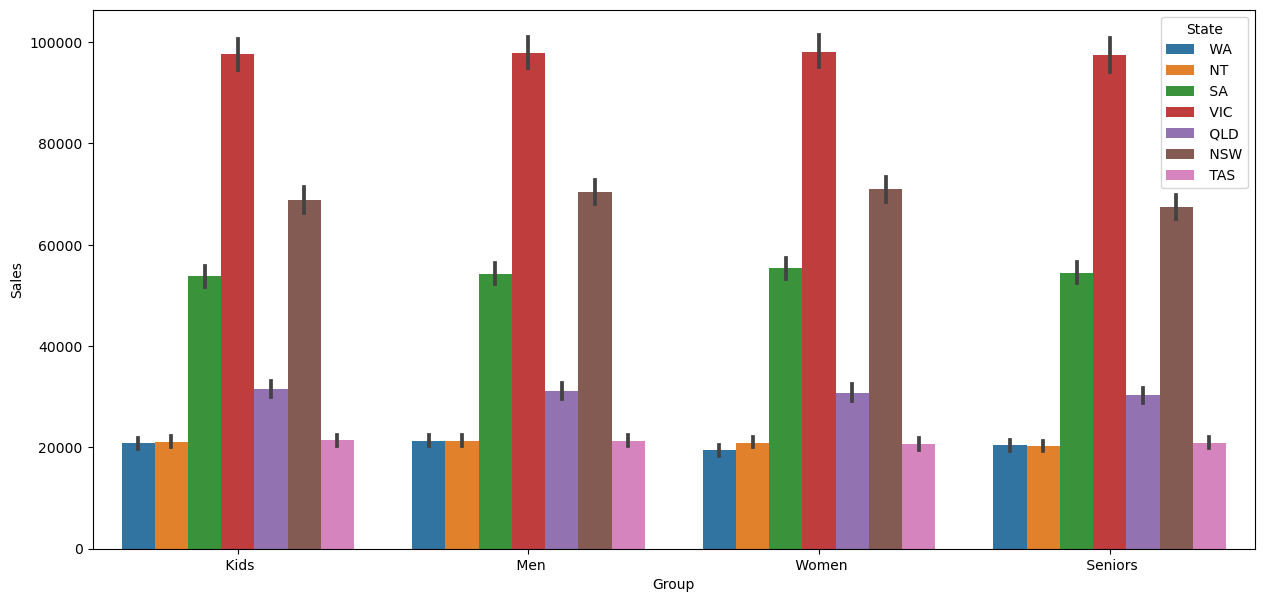

In [174]:
plt.figure(figsize=(15,7))
sns.barplot(x='Group',y='Sales',hue='State',data=df)

In [175]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'Sales' column
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define upper and lower bounds
Upper_Bound = Q3 + 1.5 * IQR
Lower_Bound = Q1 - 1.5 * IQR

# Filter data based on IQR range
filter_data = (df['Sales'] < Upper_Bound) & (df['Sales'] > Lower_Bound)

# Applying the filter to the DataFrame
df_filtered = df[filter_data]


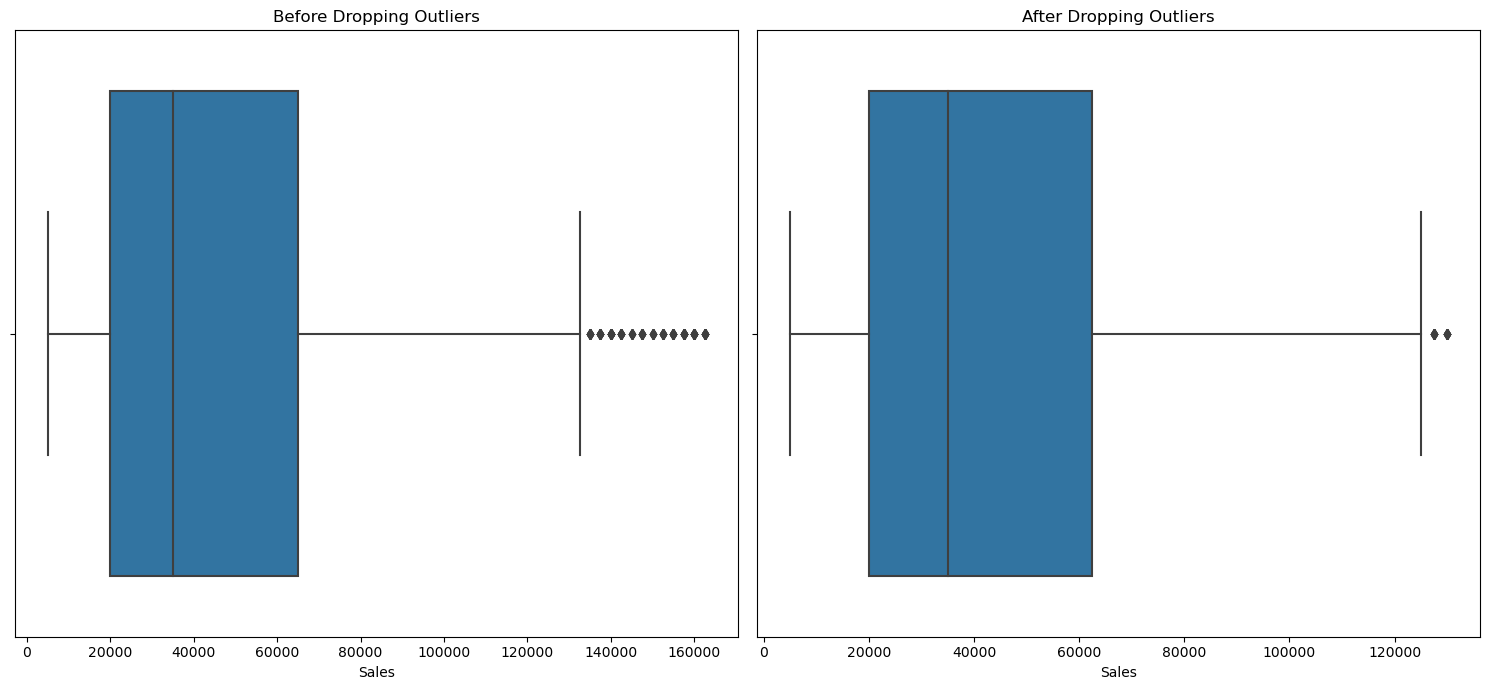

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Boxplot before dropping outliers
ax[0].set_title('Before Dropping Outliers')
sns.boxplot(x=df['Sales'], ax=ax[0])

# Boxplot after dropping outliers using the filtered DataFrame
ax[1].set_title('After Dropping Outliers')
sns.boxplot(x=df_filtered['Sales'], ax=ax[1])

# Display the plots
plt.tight_layout()
plt.show()


In [177]:
df.reset_index()

,index,Date,Time,State,Group,Unit,Sales
0,0,2020-10-01,Morning,WA,Kids,8,20000
1,1,2020-10-01,Morning,WA,Men,8,20000
2,2,2020-10-01,Morning,WA,Women,4,10000
3,3,2020-10-01,Morning,WA,Seniors,15,37500
4,4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...,...
7555,7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,7557,2020-12-30,Evening,TAS,Men,15,37500
7558,7558,2020-12-30,Evening,TAS,Women,11,27500


In [180]:
df.set_index('Date', inplace=True)

In [181]:
df

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...
2020-12-30,Afternoon,TAS,Seniors,14,35000
2020-12-30,Evening,TAS,Kids,15,37500
2020-12-30,Evening,TAS,Men,15,37500


In [182]:
weekly_report = df.resample('W-Mon').sum()

In [183]:
monthly_report = df.resample('M').sum()

In [184]:
quarterly_report = df.resample('Q').sum()

In [185]:
daily_report = df.resample('D').sum()

In [186]:
print(weekly_report)

             Unit     Sales
Date                       
2020-10-05   7563  18907500
2020-10-12  10774  26935000
2020-10-19  10722  26805000
2020-10-26  10636  26590000
2020-11-02   8319  20797500
2020-11-09   8426  21065000
2020-11-16   8497  21242500
2020-11-23   8475  21187500
2020-11-30   8577  21442500
2020-12-07  12327  30817500
2020-12-14  12824  32060000
2020-12-21  12499  31247500
2020-12-28  12803  32007500
2021-01-04   3679   9197500


In [187]:
monthly_report

,Unit,Sales
Date,,
2020-10-31,45716,114290000
2020-11-30,36273,90682500
2020-12-31,54132,135330000


In [188]:
quarterly_report

,Unit,Sales
Date,,
2020-12-31,136121,340302500


In [189]:
daily_report

,Unit,Sales
Date,,
2020-10-01,1488,3720000
2020-10-02,1486,3715000
2020-10-03,1556,3890000
2020-10-04,1488,3720000
2020-10-05,1545,3862500
...,...,...
2020-12-26,1886,4715000
2020-12-27,1855,4637500
2020-12-28,1838,4595000


In [198]:
df_daily = df.resample('D').sum()


# Creating the dashboard
fig = make_subplots(rows=2, cols=4, subplot_titles=("State-wise Sales Analysis", "Group-wise Sales Analysis", "Time-of-the-day Analysis", "Sales Trends Analysis Daily","Sales Trends Analysis Weeakly ","Sales Trends Analysis Monthly ",' ',"Sales Trends Analysis Quarterly"))

# State-wise sales analysis for different groups
fig.add_trace(go.Bar(x=df['State'], y=df['Sales'], name='Sales', marker=dict(color='rgb(34, 111, 255)')), row=1, col=1)
fig.add_trace(go.Bar(x=df['State'], y=df['normalized_Sales'], name='Normalized Sales'), row=1, col=1)

# Group-wise sales analysis across different states
fig.add_trace(go.Bar(x=df['Group'], y=df['Sales'], name='Sales'), row=1, col=2)
fig.add_trace(go.Bar(x=df['Group'], y=df['normalized_Sales'], name='Normalized Sales', marker=dict(color='rgb(55, 83, 109)')), row=1, col=2)

# Time-of-the-day analysis
df_time_analysis = df.groupby('Time').sum().reset_index()  # Aggregating data for time analysis
fig.add_trace(go.Bar(x=df_time_analysis['Time'], y=df_time_analysis['Sales'],  name='Sales'), row=1, col=3)
fig.add_trace(go.Bar(x=df_time_analysis['Time'], y=df_time_analysis['normalized_Sales'],  name='Normalized Sales'), row=1, col=3)

# Add traces for sales trends
fig.add_trace(go.Scatter(x=df_daily.index, y=df_daily['Sales'], mode='lines+markers', name='Daily Sales'), row=1, col=4)
fig.add_trace(go.Scatter(x=weekly_report.index, y=weekly_report['Sales'], mode='lines+markers', name='Weekly Sales'), row=2, col=1)
fig.add_trace(go.Scatter(x=monthly_report.index, y=monthly_report['Sales'], mode='lines+markers', name='Monthly Sales'), row=2, col=2)
fig.add_trace(go.Scatter(x=quarterly_report.index, y=quarterly_report['Sales'], mode='lines+markers', name='Quarterly Sales'), row=2, col=4)
# Update layout
fig.update_layout(showlegend=False, title_text="Sales Dashboard for S&M Head")

# Update layout to change the plot background color for effective visualization


# Optionally, adjust gridlines and axis colors for better clarity
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')

# Show the updated plot
fig.show()
